In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('scored_helpfulness_data.csv')

In [3]:
df['apartmentName'].isna().sum()

0

In [4]:
df.head()

,Unnamed: 0,apartmentName,url,rating,review,zip,propertyManager,minRent,maxRent,minSqft,maxSqft,avgRating,helpfulness,days_since_review,state,city,calculated_score
0,0,Union 505,https://www.apartments.com/union-505-albuquerq...,5.0,"A very welcoming community, convenient locatio...",NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,0,67.0,NM,ALBUQUERQUE,0.0
1,1,Union 505,https://www.apartments.com/union-505-albuquerq...,3.0,Union 505 is in a great location for Albuquerq...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,0,71.0,NM,ALBUQUERQUE,0.0
2,2,Union 505,https://www.apartments.com/union-505-albuquerq...,4.0,My Experience here at union505 is good only th...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,2,124.0,NM,ALBUQUERQUE,1.0
3,3,Union 505,https://www.apartments.com/union-505-albuquerq...,4.0,I love the apartment. Its very cozy and straig...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,2,129.0,NM,ALBUQUERQUE,1.0
4,4,Union 505,https://www.apartments.com/union-505-albuquerq...,4.0,The apartments are very spacious. The leasing ...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,2,132.0,NM,ALBUQUERQUE,1.0


In [5]:
df['calculated_score'].mean()

0.5178915074030669

In [6]:
df['calculated_score'].isna().sum()

8705

In [7]:
df.dropna(subset= ['calculated_score'], inplace = True)

In [8]:
len(df)

40708

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)

In [10]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

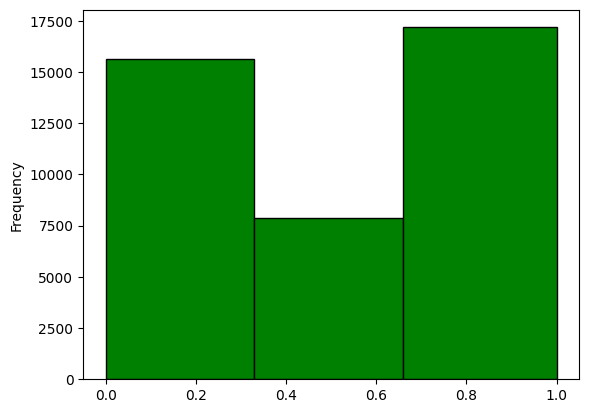

In [11]:
bins1 = [0, 0.33, 0.66, 1.0]
df['calculated_score'].plot.hist(bins = bins1, color='green', edgecolor='black')

<Axes: ylabel='Frequency'>

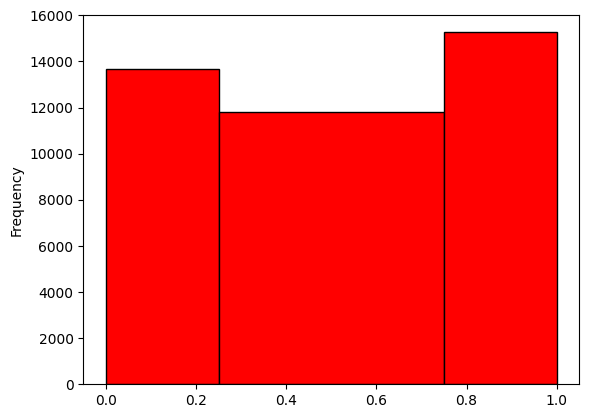

In [12]:
bins1 = [0, 0.25, 0.75, 1.0]
df['calculated_score'].plot.hist(bins = bins1, color='red', edgecolor='black')

<Axes: ylabel='Frequency'>

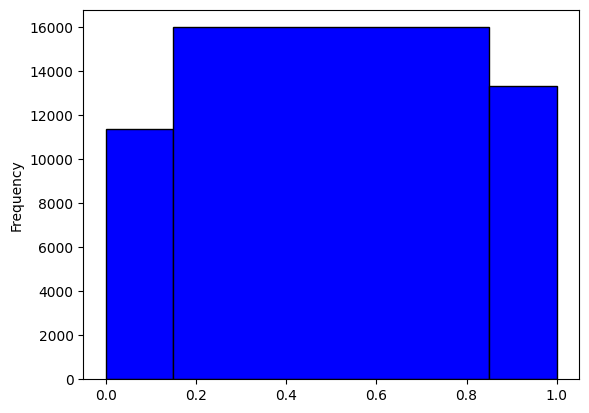

In [13]:
bins3 = [0, 0.15, 0.85, 1.0]
df['calculated_score'].plot.hist(bins = bins3, color='blue', edgecolor='black')

<Axes: ylabel='Frequency'>

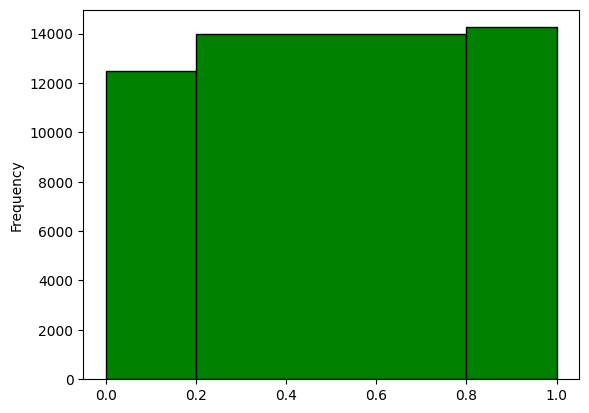

In [14]:
bins4 = [0, 0.2, 0.8, 1.0]
df['calculated_score'].plot.hist(bins = bins4, color='green', edgecolor='black')

In [15]:
from sklearn.cluster import KMeans

In [16]:
n_clusters = 3
kmeans = KMeans(n_clusters, random_state=0)
df['kmeans_label'] = kmeans.fit_predict(df[['calculated_score']])

<BarContainer object of 3 artists>

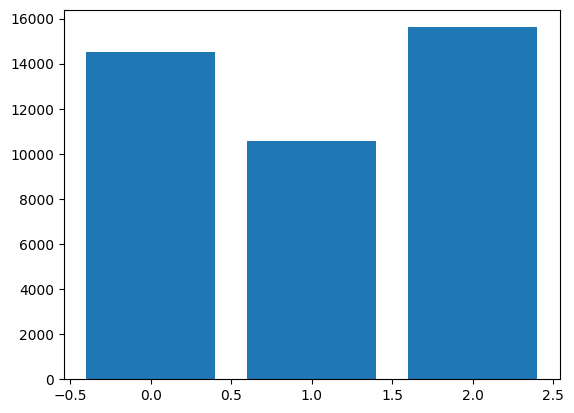

In [17]:
from collections import Counter
cntr = Counter(df['kmeans_label'])
plt.bar(cntr.keys(),cntr.values())

In [18]:
df.head()

,apartmentName,url,rating,review,zip,propertyManager,minRent,maxRent,minSqft,maxSqft,avgRating,helpfulness,days_since_review,state,city,calculated_score,kmeans_label
0,Union 505,https://www.apartments.com/union-505-albuquerq...,5.0,"A very welcoming community, convenient locatio...",NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,0,67.0,NM,ALBUQUERQUE,0.0,0
1,Union 505,https://www.apartments.com/union-505-albuquerq...,3.0,Union 505 is in a great location for Albuquerq...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,0,71.0,NM,ALBUQUERQUE,0.0,0
2,Union 505,https://www.apartments.com/union-505-albuquerq...,4.0,My Experience here at union505 is good only th...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,2,124.0,NM,ALBUQUERQUE,1.0,2
3,Union 505,https://www.apartments.com/union-505-albuquerq...,4.0,I love the apartment. Its very cozy and straig...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,2,129.0,NM,ALBUQUERQUE,1.0,2
4,Union 505,https://www.apartments.com/union-505-albuquerq...,4.0,The apartments are very spacious. The leasing ...,NM 87102,https://www.apartments.com/pmc/greystar/dv0gtnl/,850,2662,324.0,755.0,4.0,2,132.0,NM,ALBUQUERQUE,1.0,2


In [19]:
df.to_csv('kmeans_labeled_helpfulness_data_final.csv')

In [16]:
n_clusters = 2
kmeans = KMeans(n_clusters, random_state=0)
df['kmeans_label'] = kmeans.fit_predict(df[['calculated_score']])

<BarContainer object of 2 artists>

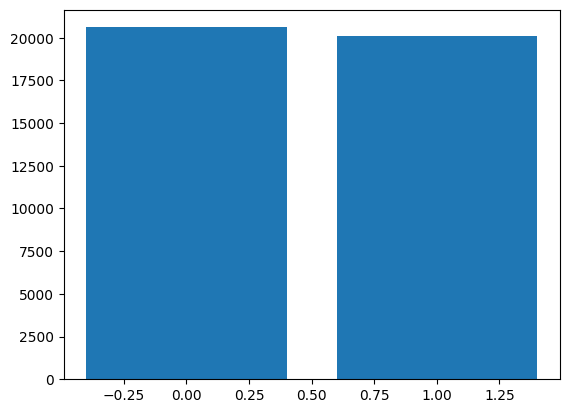

In [17]:
from collections import Counter
cntr = Counter(df['kmeans_label'])
plt.bar(cntr.keys(),cntr.values())

In [18]:
df.to_csv('kmeans_binary_labeled_helpfulness_data_final.csv')